In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abalone-dataset/abalone.csv


In [2]:
df=pd.read_csv('/kaggle/input/abalone-dataset/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.shape

(4177, 9)

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Check null values in the dataset

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Here an interesting thing to note is the height part.It is 0 in some cases.Thus ,we shall see that we have to impute those values with the next minimum value as 0 is not possible as height

In [7]:
df.Height.unique()

array([0.095, 0.09 , 0.135, 0.125, 0.08 , 0.15 , 0.14 , 0.11 , 0.145,
       0.1  , 0.13 , 0.085, 0.155, 0.165, 0.185, 0.18 , 0.175, 0.2  ,
       0.105, 0.045, 0.055, 0.05 , 0.12 , 0.07 , 0.16 , 0.06 , 0.17 ,
       0.195, 0.19 , 0.115, 0.075, 0.065, 0.215, 0.21 , 0.23 , 0.205,
       0.22 , 0.04 , 0.01 , 0.03 , 0.035, 0.225, 0.24 , 0.235, 0.02 ,
       0.025, 0.015, 0.   , 0.515, 0.25 , 1.13 ])

In [8]:
df['Height']=df['Height'].replace({0:0.1})

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139564,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041724,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Thus now its fine!!!

## Outlier treatment

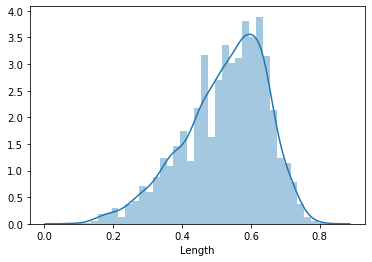

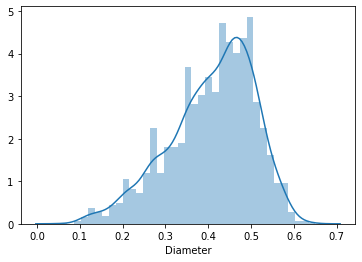

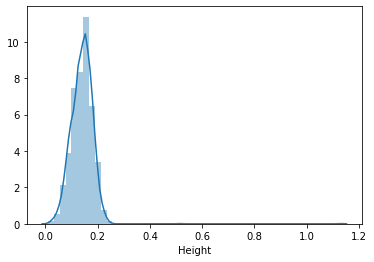

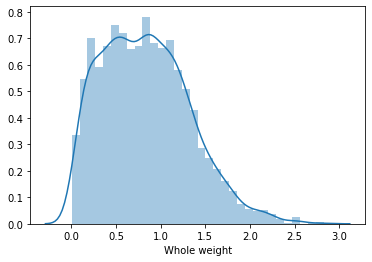

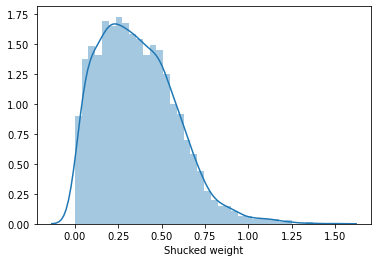

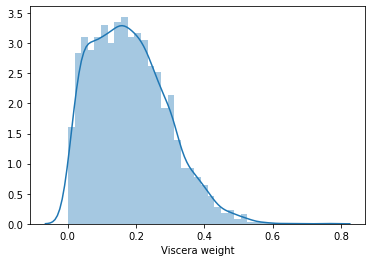

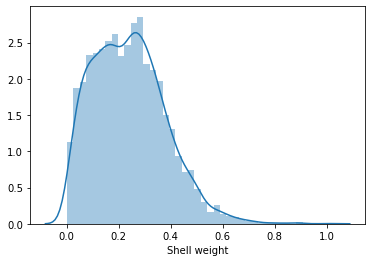

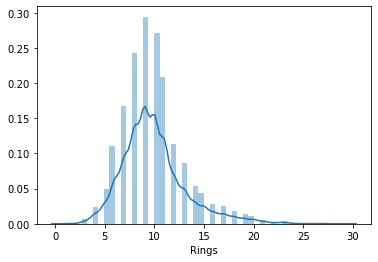

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        sns.distplot(df[i])
        plt.show()

In [11]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.166029
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

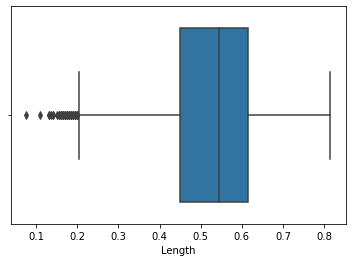

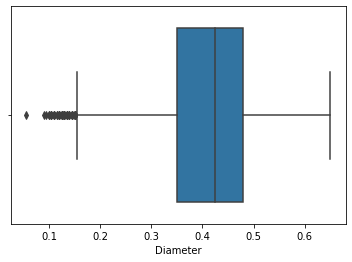

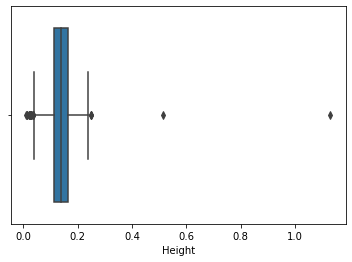

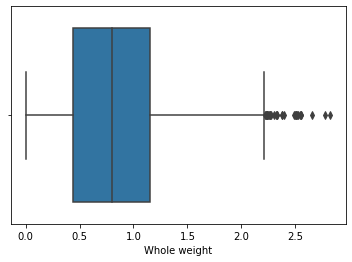

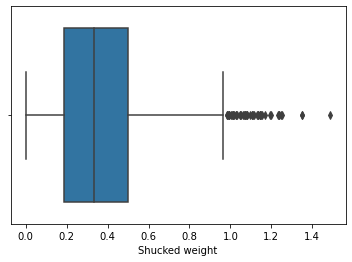

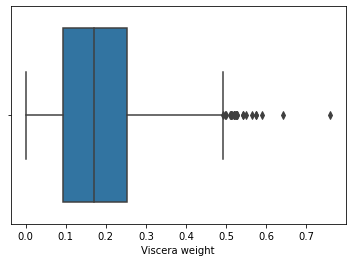

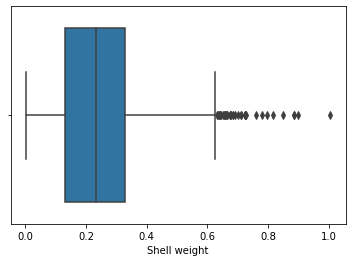

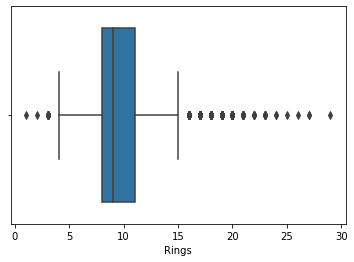

In [12]:
for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        sns.boxplot(df[i])
        plt.show()

In [13]:
def outlier(df):
    for i in df.columns:
        if df[i].dtype=='float64' or df[i].dtype=='int64':
            Q3=df[i].quantile(0.75)
            Q1=df[i].quantile(0.25)
            IQR=Q3-Q1
            UL=Q3+1.5*IQR
            LL=Q1-1.5*IQR
            df=df[(df[i]<UL)&(df[i]>LL)]
        
    return df

In [14]:
outlier(df)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


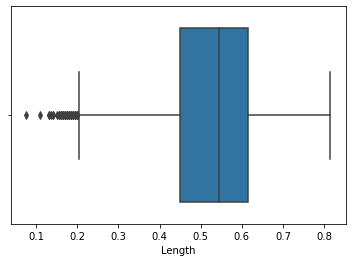

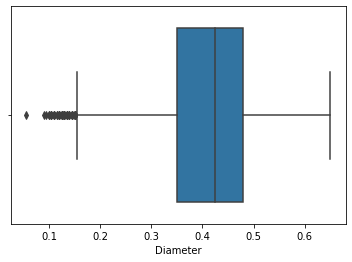

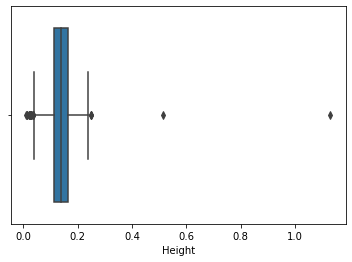

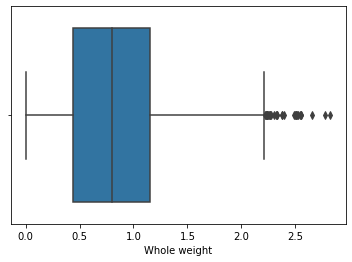

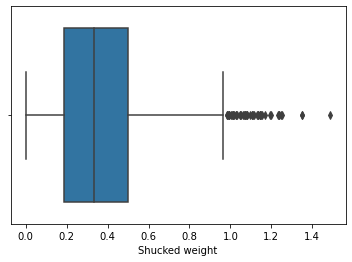

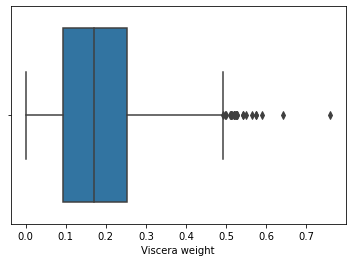

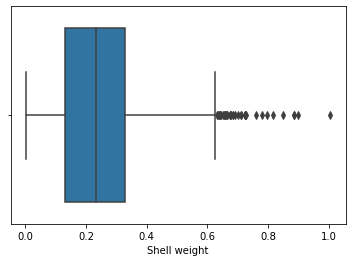

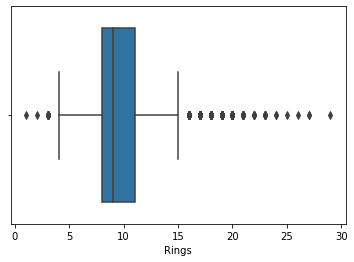

In [15]:
for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        sns.boxplot(df[i])
        plt.show()

### Thus with a single function we have treated IQR for all features.Hence outlier treatment done

In [16]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.166029
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

### We observe that the Rings are having categorical type values.Thus we shall convert the datatype to categorical


In [17]:
df['Rings']=df['Rings'].astype('object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   object 
dtypes: float64(7), object(2)
memory usage: 293.8+ KB


### Thus successfully we have converted the Rings to object type

In [19]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

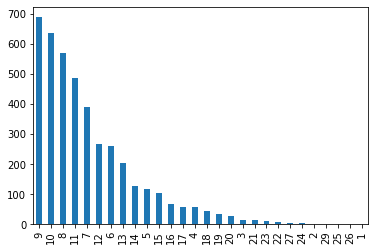

In [20]:
df['Rings'].value_counts().plot(kind='bar')
plt.show()

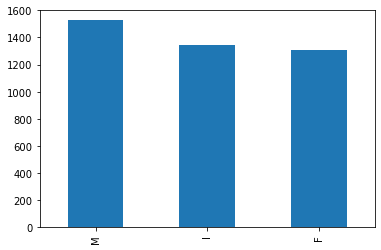

In [21]:
df['Sex'].value_counts().plot(kind='bar')
plt.show()

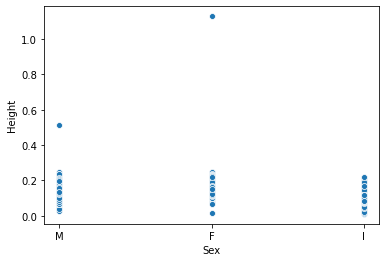

In [22]:
sns.scatterplot(y=df['Height'],x=df['Sex'])
plt.show()

#### All the Sex have similar height except some outliers in M& F.

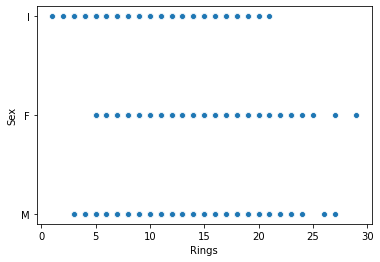

In [23]:
sns.scatterplot(df['Rings'],df['Sex'])
plt.show()

The number of Rings which can be seen visually is in the order-I<M<F

In [24]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [25]:
Wt=['Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']

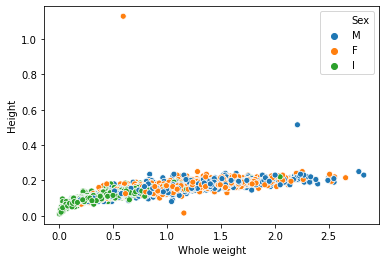

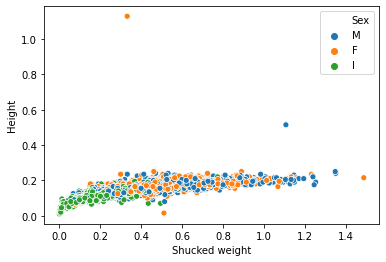

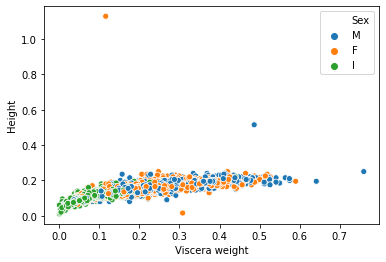

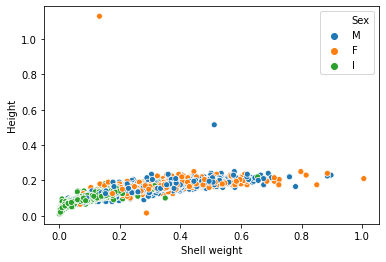

In [26]:
for i in Wt:
    sns.scatterplot(df[i],df['Height'],hue=df['Sex'])
    plt.show()

#### Great !!! Looks clearly that among the weights,I gender has the least.Among Male & Female,Males have the more weight than the females as per the plots!!

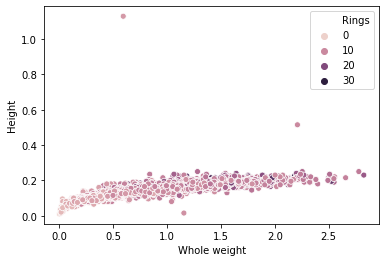

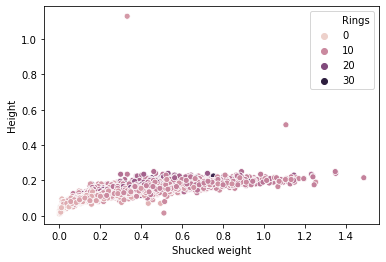

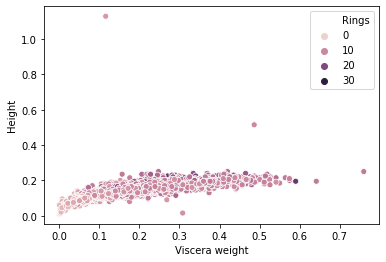

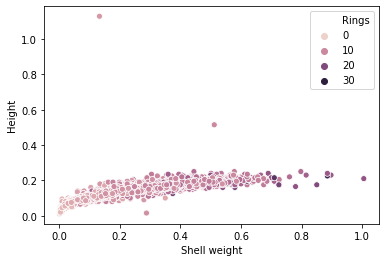

In [27]:
for i in Wt:
    sns.scatterplot(df[i],df['Height'],hue=df['Rings'])
    plt.show()

#### There is no clear indication that Weight increases the number of rings.Looks like that can be solved with the heatmap of ours

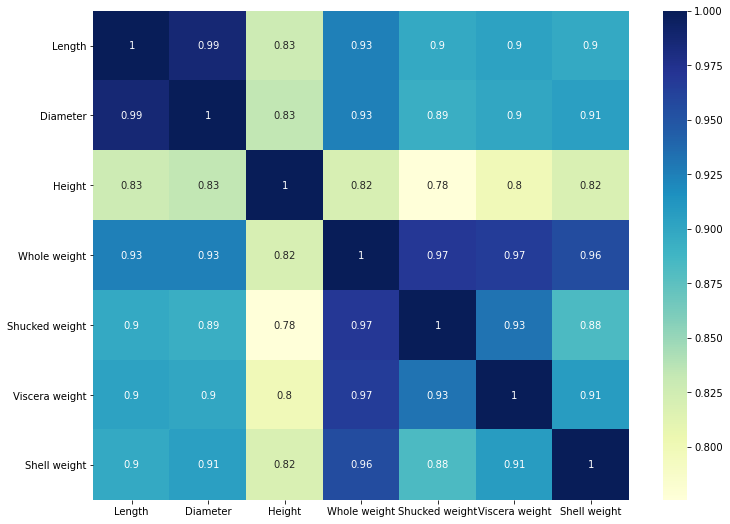

In [28]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

### Thus it concludes the end of an Abalone journey with EDA.Here we need to predict the age of the  Abalone. Thus we can use Unsupervised learning methods to do it.